In [1]:
%pylab inline
import os
import DracoPy
import vtk
from vtk.util import numpy_support

import trako as TKO

%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
DATADIR = '/home/d/DATA/Dropbox/ADHD_STFC_diff_for_Daniel/'

In [3]:
SUBJECTS = ['101','201']
GROUP = ['tracts_left_hemisphere']

In [4]:
files = os.listdir(os.path.join(DATADIR,SUBJECTS[0],GROUP[0]))
files[0]

'cluster_00616.vtp'

In [5]:
r = vtk.vtkXMLPolyDataReader()
r.SetFileName(os.path.join(DATADIR,SUBJECTS[0],GROUP[0],files[0]))
r.Update()
polydata = r.GetOutput()

In [6]:
points = numpy_support.vtk_to_numpy(polydata.GetPoints().GetData())

print('bytes', points.nbytes)
print('count', len(points.ravel()))

pointdata = polydata.GetPointData()
number_of_scalars = pointdata.GetNumberOfArrays()
scalars = np.zeros((points.shape[0], number_of_scalars))
scalar_names = []#np.empty((10,20),dtype=np.byte)

for i in range(number_of_scalars):
    arr_name = pointdata.GetArrayName(i)
    scalar_names.append(arr_name[0:20])
    scalar_array = numpy_support.vtk_to_numpy(pointdata.GetArray(i))
    print('Loading Scalar', arr_name, 'bytes', scalar_array.nbytes)
    scalars[:, i] = scalar_array


bytes 271020
count 67755
Loading Scalar NormalizedSignalEstimationError bytes 90340
Loading Scalar EstimatedUncertainty bytes 90340
Loading Scalar RTOP1 bytes 90340
Loading Scalar RTOP2 bytes 90340
Loading Scalar RTAP1 bytes 90340
Loading Scalar RTAP2 bytes 90340
Loading Scalar RTPP1 bytes 90340
Loading Scalar RTPP2 bytes 90340
Loading Scalar SignalMean bytes 90340


Position+Sequential
compressed bytes 70603
ratio 3.8386470829851422
restored count 67755
(0.0, 0.0019207000732421875, 0.0009555382405501677, 0.0005525281016645821)


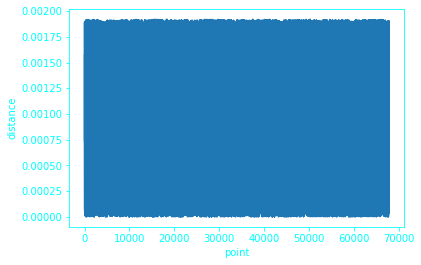

before
 [[-45.17117   17.051968  23.95285 ]
 [-44.73242   17.03107   24.136826]
 [-44.290363  17.010515  24.320517]
 [-43.845276  16.989777  24.504248]
 [-43.393936  16.973394  24.680552]
 [-42.93451   16.963942  24.84385 ]
 [-42.46606   16.963478  24.989338]
 [-41.986324  16.977627  25.103668]
 [-41.498077  17.0051    25.186945]
 [-41.004932  17.039797  25.25178 ]]
after
 [[-45.17190933  17.05336571  23.9532814 ]
 [-44.73095322  17.03035927  24.13733292]
 [-44.28999329  17.0111866   24.32138443]
 [-43.8452034   16.98818016  24.50543594]
 [-43.39274216  16.97284508  24.68181992]
 [-42.93261337  16.96517372  24.84286499]
 [-42.46481323  16.96517372  24.98857117]
 [-41.98551178  16.97667885  25.10360527]
 [-41.49854279  17.00351906  25.18796158]
 [-41.00390244  17.03802681  25.25314713]]


In [7]:
print('Position+Sequential')
compressed_points = DracoPy.encode_point_cloud_to_buffer(points.ravel(), position=True, sequential=True, quantization_bits=14, create_metadata=True)
print('compressed bytes', len(compressed_points))
print('ratio', points.nbytes / len(compressed_points))
restored_points = DracoPy.decode_point_cloud_buffer(compressed_points)
print('restored count', len(restored_points.points))
stats, distances = TKO.Util.error(points.ravel()[0:len(restored_points.points)], restored_points.points)
print(stats)
TKO.Util.plot(distances, 'point', 'distance')
print('before\n', points[0:10])
print('after\n', np.array(restored_points.points[0:30]).reshape(10,3))

******************** NormalizedSignalEsti
Position+Sequential
count 22585
compressed bytes 34871
ratio 5.18138281093172
restored count 22584
(0.0, 1.5255063772201538e-06, 7.576107799187382e-07, 4.412965631270927e-07)


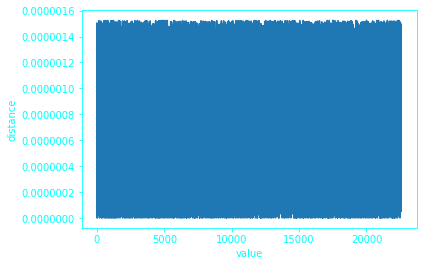

before
 [0.02077771 0.02211147 0.         0.02211147 0.02426182 0.02672053
 0.0279308  0.026392   0.02355403 0.02190321 0.0217132  0.02075405
 0.02028615 0.01936602 0.01790336 0.01684256 0.01689101 0.01752107
 0.01675693 0.01492498 0.01292363 0.0118389  0.01111359 0.01042332
 0.01021205 0.01111985 0.01247086 0.01465327 0.01456168 0.01489185]
after
 [0.02077849 0.02211107 0.         0.02211107 0.02426089 0.02672174
 0.0279293  0.02639241 0.02355343 0.02190372 0.02171465 0.0207541
 0.02028754 0.01936663 0.01790293 0.01684174 0.01689053 0.01752175
 0.01675636 0.01492368 0.01292328 0.0118377  0.011115   0.01042279
 0.01021238 0.0111211  0.01247198 0.01465228 0.0145608  0.01489319]
******************** EstimatedUncertainty
Position+Sequential
count 22585
compressed bytes 31314
ratio 5.7699431564156605
restored count 22584
(0.0, 0.423828125, 0.21174492668776151, 0.12355524903805838)


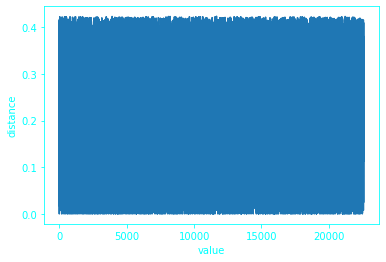

before
 [6.00216797e+02 3.00687225e+02 3.87298353e-02 3.00687225e+02
 6.00216797e+02 8.97917603e+02 1.19277759e+03 1.48384900e+03
 1.77075488e+03 2.05359106e+03 2.33212085e+03 2.60585352e+03
 2.87321704e+03 3.13210791e+03 3.37888135e+03 3.61143823e+03
 3.83223145e+03 4.04655615e+03 4.25358398e+03 4.44447754e+03
 4.61495654e+03 4.75974561e+03 4.87700879e+03 4.97382812e+03
 5.05844092e+03 5.13525732e+03 5.20425781e+03 5.27104541e+03
 5.27709424e+03 5.37968945e+03]
after
 [6.00603943e+02 3.00321320e+02 3.87298353e-02 3.00321320e+02
 6.00603943e+02 8.97503052e+02 1.19271033e+03 1.48368848e+03
 1.77043713e+03 2.05380249e+03 2.33209253e+03 2.60615332e+03
 2.87344702e+03 3.13228223e+03 3.37927515e+03 3.61104272e+03
 3.83181372e+03 4.04666382e+03 4.25390088e+03 4.44422070e+03
 4.61508594e+03 4.75972900e+03 4.87730469e+03 4.97373340e+03
 5.05831982e+03 5.13529395e+03 5.20465479e+03 5.27063232e+03
 5.27739941e+03 5.37974902e+03]
******************** RTOP1
Position+Sequential
count 22585
compress

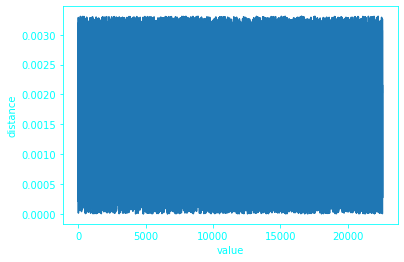

before
 [1.93121159 1.93386614 1.93386626 1.93386614 1.93058586 1.92395914
 1.91407287 1.8969624  1.88458157 1.88188314 1.88305342 1.89253747
 1.91056383 1.95207179 2.00672412 2.05174088 2.07800031 2.10900044
 2.17851782 2.25000691 2.32026649 2.38737822 2.45124507 2.5123291
 2.56724095 2.60557246 2.62733436 2.64002681 2.65406322 2.66810942]
after
 [1.93363798 1.93550372 1.93112588 1.93363798 1.92888498 1.92450714
 1.91378164 1.89579117 1.88479447 1.88068783 1.88255358 1.89141321
 1.91378164 1.95535994 2.00393224 2.05277562 2.08111644 2.10983229
 2.17853212 2.25320435 2.32163286 2.39033246 2.45176697 2.51357698
 2.56903911 2.60399866 2.62609577 2.64184546 2.65694857 2.6658082 ]
******************** RTOP2
Position+Sequential
count 22585
compressed bytes 11540
ratio 15.65684575389948
restored count 22584
(0.0, 0.08645915985107422, 0.0437832278348941, 0.02495302328670824)


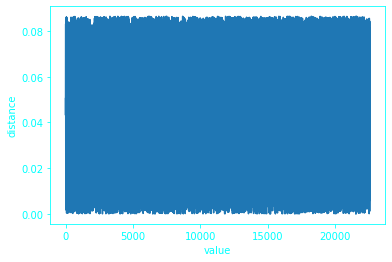

before
 [1.93121159 1.93386614 1.93386626 1.93386614 1.9305886  1.92397344
 1.91412532 1.89725792 1.88581669 1.88472784 1.88723683 1.90121615
 1.92725313 1.99215364 2.09188199 2.18548203 2.24435019 2.31664109
 2.49764442 2.72940159 3.02302027 3.37927914 3.75738692 4.12382984
 4.49485731 4.97857523 5.60231781 6.30906487 6.46990013 6.64444971]
after
 [1.98165798 1.97705781 1.979177   1.98165798 1.97705781 1.979177
 1.98165798 1.97705781 1.80625141 1.80873239 1.80413222 1.979177
 1.98165798 1.97705781 2.15210247 2.15458345 2.32290888 2.32502818
 2.50043464 2.66876006 3.01673031 3.36506271 3.70631361 4.0542841
 4.5755415  4.91679239 5.61061382 6.30479717 6.4731226  6.64816761]
******************** RTAP1
Position+Sequential
count 22585
compressed bytes 25831
ratio 6.9946962951492395
restored count 22584
(0.0, 0.0010943412780761719, 0.0005462308471354026, 0.0003152466508149462)


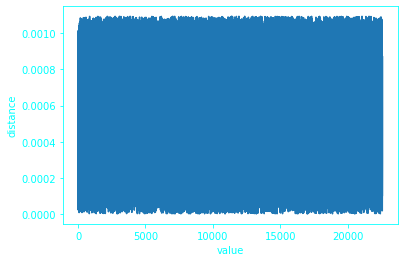

before
 [2.00401568 2.00741196 2.0074122  2.00741196 2.00182772 1.99089897
 1.97469652 1.94555521 1.92057323 1.90980351 1.90714097 1.90825737
 1.9175508  1.94509506 1.98561347 2.02175164 2.04387259 2.07076979
 2.13138318 2.19266272 2.2510829  2.30509377 2.35606098 2.40541673
 2.45030618 2.48063326 2.49675941 2.50621057 2.51908684 2.53290868]
after
 [2.00453806 2.00686073 2.00769401 2.00672674 2.00248337 1.99018443
 1.97389627 1.9455775  1.92014635 1.91042435 1.9061811  1.90920293
 1.9169904  1.9455775  1.98580706 2.02204752 2.04406857 2.07116604
 2.13148189 2.19289947 2.25063848 2.30438852 2.35705113 2.40603542
 2.45103073 2.4796176  2.49577188 2.5057478  2.51901412 2.53297949]
******************** RTAP2
Position+Sequential
count 22585
compressed bytes 11763
ratio 15.360027203944572
restored count 22584
(0.0, 0.07083702087402344, 0.03565942878487513, 0.02060487350781754)


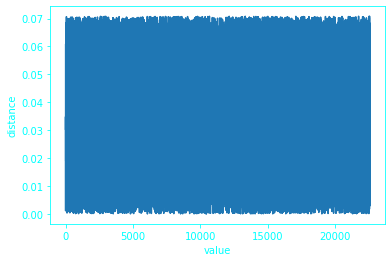

before
 [2.00401568 2.00741196 2.0074122  2.00741196 2.00183105 1.99091601
 1.97475874 1.94590259 1.92202556 1.9131602  1.91208684 1.91852677
 1.93724668 1.99192631 2.08354259 2.17346191 2.23106289 2.30228901
 2.48048472 2.70765829 2.99368668 3.33830905 3.70083714 4.04915142
 4.40134382 4.86818838 5.47769547 6.17456818 6.33930445 6.5149703 ]
after
 [1.97363806 1.97298169 1.97258019 1.97363806 1.97298169 1.97258019
 1.97363806 1.97298169 1.97258019 1.97363806 1.97298169 1.97258019
 1.97363806 1.97298169 2.11427069 2.11532879 2.25636292 2.25596142
 2.54040098 2.68143511 2.96441507 3.39054489 3.67326975 4.09794044
 4.38237953 4.8067956  5.51484728 6.22435856 6.36539316 6.5066824 ]
******************** RTPP1
Position+Sequential
count 22585
compressed bytes 24774
ratio 7.2931298942439655
restored count 22584
(0.0, 0.00011897087097167969, 5.94231863204275e-05, 3.4410898456149726e-05)


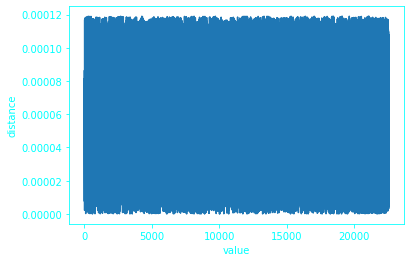

before
 [0.94959122 0.94936419 0.94936413 0.94936419 0.95033824 0.95215237
 0.95486248 0.96029747 0.96650386 0.97081888 0.97298694 0.97798979
 0.98344892 0.99231869 1.00114739 1.00655913 1.00903785 1.01145828
 1.01643229 1.02167106 1.02729321 1.03312111 1.03851378 1.04310107
 1.0467782  1.04966497 1.05172312 1.05288708 1.05314088 1.05300081]
after
 [0.94967258 0.94929975 0.94935656 0.94943458 0.95025182 0.95221269
 0.95490885 0.96024823 0.96649325 0.97085547 0.97310072 0.97791773
 0.98346996 0.99237955 1.00124264 1.00655699 1.00904024 1.01147711
 1.01631534 1.02165473 1.0271858  1.03321409 1.03855348 1.04313242
 1.04678059 1.04973984 1.05170083 1.05296886 1.05307198 1.05289078]
******************** RTPP2
Position+Sequential
count 22585
compressed bytes 21927
ratio 8.240069320928535
restored count 22584
(0.0, 0.00019097328186035156, 9.524862351588142e-05, 5.5107054524153204e-05)


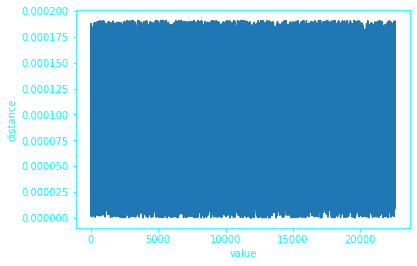

before
 [0.94959122 0.94936419 0.94936413 0.94936419 0.95033813 0.95215166
 0.95486003 0.96028376 0.96643794 0.97064763 0.97272086 0.977395
 0.98226827 0.98954999 0.99585831 0.99924403 1.00070608 1.00215614
 1.00538611 1.00909388 1.01332855 1.01790679 1.02238941 1.02645457
 1.02987444 1.03210378 1.03317654 1.0332669  1.03246689 1.03205991]
after
 [0.94954544 0.94924426 0.9495436  0.94954544 0.95038962 0.95221609
 0.95489043 0.960316   0.96634215 0.97054362 0.97253317 0.97741395
 0.98237896 0.98971349 0.99573964 0.99917758 1.00078523 1.00222993
 1.0052861  1.0091846  1.01330173 1.01788497 1.02254701 1.02628243
 1.02972043 1.03209162 1.03315461 1.03315639 1.03247344 1.03200924]
******************** SignalMean
Position+Sequential
count 22585
compressed bytes 32197
ratio 5.611702953691338
restored count 22584
(0.0, 1.1026859283447266e-06, 5.484393445068791e-07, 3.20339927127767e-07)


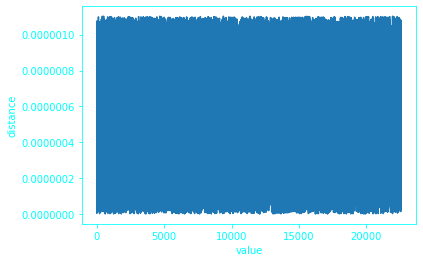

before
 [0.03410789 0.03302184 0.03302184 0.03302184 0.03154575 0.0302351
 0.02947978 0.02924204 0.0294069  0.0296475  0.02971201 0.02938212
 0.02869859 0.02795096 0.02747653 0.02726929 0.02723707 0.02718835
 0.02706701 0.02670706 0.02612094 0.0255615  0.02534177 0.0254011
 0.02554235 0.02538661 0.02501815 0.02461859 0.02439532 0.02441836]
after
 [0.03410771 0.03302102 0.03302196 0.03302161 0.03154498 0.0302351
 0.02947911 0.02924279 0.02940676 0.02964654 0.02971204 0.02938252
 0.02869923 0.02795181 0.02747689 0.02726945 0.02723802 0.02718829
 0.02706677 0.02670709 0.02612201 0.02556209 0.0253412  0.02540162
 0.02554226 0.02538746 0.02501829 0.02461919 0.02439609 0.02441906]


In [19]:
ratios1 = []
for i in range(scalars.shape[1]):
    print('*'*20, scalar_names[i])
    print('Position+Sequential')
    scalar = scalars[:,i].ravel()
    print('count', len(scalar))
    compressed_scalars = DracoPy.encode_point_cloud_to_buffer(scalar, position=True, sequential=True, quantization_bits=14, create_metadata=True)
    print('compressed bytes', len(compressed_scalars))
    ratio = scalar.nbytes / len(compressed_scalars)
    ratios1.append(ratio)
    print('ratio', ratio)
    restored_scalars = DracoPy.decode_point_cloud_buffer(compressed_scalars)
    print('restored count', len(restored_scalars.points))
    stats, distances = TKO.Util.error(scalar.ravel()[0:len(restored_scalars.points)], restored_scalars.points)
    print(stats)
    TKO.Util.plot(distances, 'value', 'distance')
    print('before\n', scalar[0:30])
    print('after\n', np.array(restored_scalars.points[0:30]))

******************** NormalizedSignalEsti
Generic+Sequential
compressed bytes 34734
ratio 5.201819542811078
restored count 22585
(0.0, 1.5255063772201538e-06, 7.576150693888418e-07, 4.4128726415861616e-07)


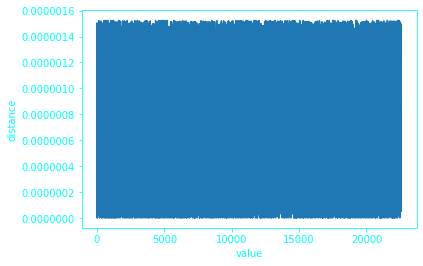

before
 [0.02077771 0.02211147 0.         0.02211147 0.02426182 0.02672053
 0.0279308  0.026392   0.02355403 0.02190321 0.0217132  0.02075405
 0.02028615 0.01936602 0.01790336 0.01684256 0.01689101 0.01752107
 0.01675693 0.01492498 0.01292363 0.0118389  0.01111359 0.01042332
 0.01021205 0.01111985 0.01247086 0.01465327 0.01456168 0.01489185]
after
 [0.02077849 0.02211107 0.         0.02211107 0.02426089 0.02672174
 0.0279293  0.02639241 0.02355343 0.02190372 0.02171465 0.0207541
 0.02028754 0.01936663 0.01790293 0.01684174 0.01689053 0.01752175
 0.01675636 0.01492368 0.01292328 0.0118377  0.011115   0.01042279
 0.01021238 0.0111211  0.01247198 0.01465228 0.0145608  0.01489319]
******************** EstimatedUncertainty
Generic+Sequential
compressed bytes 27755
ratio 6.509818050801657
restored count 22585
(0.0, 0.423828125, 0.211749733753217, 0.1235546255802334)


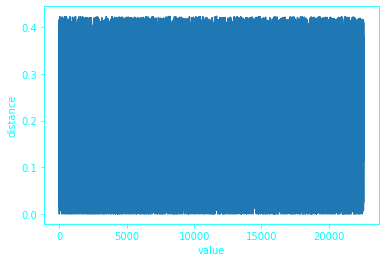

before
 [6.00216797e+02 3.00687225e+02 3.87298353e-02 3.00687225e+02
 6.00216797e+02 8.97917603e+02 1.19277759e+03 1.48384900e+03
 1.77075488e+03 2.05359106e+03 2.33212085e+03 2.60585352e+03
 2.87321704e+03 3.13210791e+03 3.37888135e+03 3.61143823e+03
 3.83223145e+03 4.04655615e+03 4.25358398e+03 4.44447754e+03
 4.61495654e+03 4.75974561e+03 4.87700879e+03 4.97382812e+03
 5.05844092e+03 5.13525732e+03 5.20425781e+03 5.27104541e+03
 5.27709424e+03 5.37968945e+03]
after
 [6.00603943e+02 3.00321320e+02 3.87298353e-02 3.00321320e+02
 6.00603943e+02 8.97503052e+02 1.19271033e+03 1.48368848e+03
 1.77043713e+03 2.05380249e+03 2.33209253e+03 2.60615332e+03
 2.87344702e+03 3.13228223e+03 3.37927515e+03 3.61104272e+03
 3.83181372e+03 4.04666382e+03 4.25390088e+03 4.44422070e+03
 4.61508594e+03 4.75972900e+03 4.87730469e+03 4.97373340e+03
 5.05831982e+03 5.13529395e+03 5.20465479e+03 5.27063232e+03
 5.27739941e+03 5.37974902e+03]
******************** RTOP1
Generic+Sequential
compressed bytes 2013

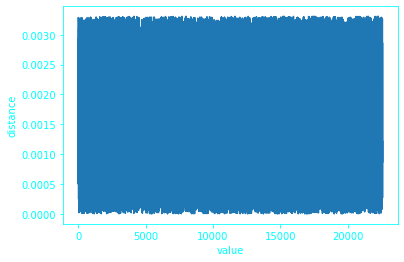

before
 [1.93121159 1.93386614 1.93386626 1.93386614 1.93058586 1.92395914
 1.91407287 1.8969624  1.88458157 1.88188314 1.88305342 1.89253747
 1.91056383 1.95207179 2.00672412 2.05174088 2.07800031 2.10900044
 2.17851782 2.25000691 2.32026649 2.38737822 2.45124507 2.5123291
 2.56724095 2.60557246 2.62733436 2.64002681 2.65406322 2.66810942]
after
 [1.92888498 1.93550372 1.93550372 1.93550372 1.92888498 1.92226624
 1.91564751 1.89579117 1.88255358 1.88255358 1.88255358 1.89579117
 1.90902865 1.95535994 2.00831008 2.05464149 2.08111644 2.10759163
 2.18039799 2.25320435 2.31939197 2.38557959 2.45176697 2.51133585
 2.56428599 2.60399866 2.63047361 2.63709259 2.65694857 2.67018628]
******************** RTOP2
Generic+Sequential
compressed bytes 9194
ratio 19.65194692190559
restored count 22585
(0.0, 0.08646202087402344, 0.043822848340275805, 0.024944582253475626)


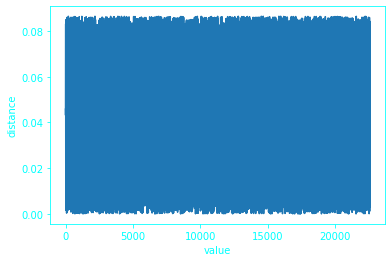

before
 [1.93121159 1.93386614 1.93386626 1.93386614 1.9305886  1.92397344
 1.91412532 1.89725792 1.88581669 1.88472784 1.88723683 1.90121615
 1.92725313 1.99215364 2.09188199 2.18548203 2.24435019 2.31664109
 2.49764442 2.72940159 3.02302027 3.37927914 3.75738692 4.12382984
 4.49485731 4.97857523 5.60231781 6.30906487 6.46990013 6.64444971]
after
 [1.97705805 1.97705805 1.97705805 1.97705805 1.97705805 1.97705805
 1.97705805 1.97705805 1.80413234 1.80413234 1.80413234 1.97705805
 1.97705805 1.97705805 2.14998388 2.14998388 2.32290936 2.32290936
 2.4958353  2.66876078 3.0146122  3.36046362 3.70631504 4.05216646
 4.57094383 4.91679525 5.6084981  6.30020046 6.47312641 6.64605236]
******************** RTAP1
Generic+Sequential
compressed bytes 24318
ratio 7.429887326260383
restored count 22585
(0.0, 0.0010943412780761719, 0.0005467998999949707, 0.0003135605299602207)


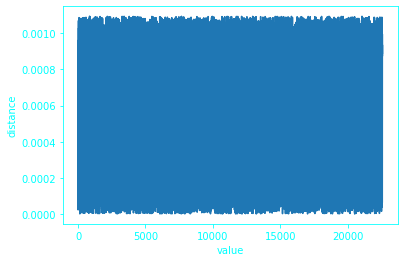

before
 [2.00401568 2.00741196 2.0074122  2.00741196 2.00182772 1.99089897
 1.97469652 1.94555521 1.92057323 1.90980351 1.90714097 1.90825737
 1.9175508  1.94509506 1.98561347 2.02175164 2.04387259 2.07076979
 2.13138318 2.19266272 2.2510829  2.30509377 2.35606098 2.40541673
 2.45030618 2.48063326 2.49675941 2.50621057 2.51908684 2.53290868]
after
 [2.00467205 2.00686073 2.00686073 2.00686073 2.00248337 1.99153996
 1.97403049 1.9455775  1.92150187 1.91055846 1.9061811  1.90836978
 1.91712451 1.9455775  1.98497391 2.02218151 2.04406857 2.07033277
 2.13161612 2.19289947 2.25199413 2.30452251 2.35705113 2.40520239
 2.45116472 2.4796176  2.49712729 2.50588202 2.51901412 2.53214645]
******************** RTAP2
Generic+Sequential
compressed bytes 9496
ratio 19.026958719460826
restored count 22585
(0.0, 0.07084214687347412, 0.03566082325133703, 0.020593167943063127)


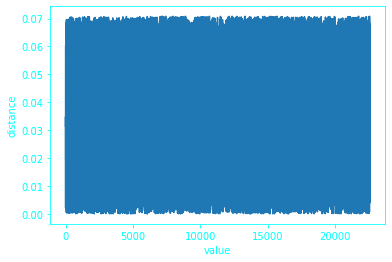

before
 [2.00401568 2.00741196 2.0074122  2.00741196 2.00183105 1.99091601
 1.97475874 1.94590259 1.92202556 1.9131602  1.91208684 1.91852677
 1.93724668 1.99192631 2.08354259 2.17346191 2.23106289 2.30228901
 2.48048472 2.70765829 2.99368668 3.33830905 3.70083714 4.04915142
 4.40134382 4.86818838 5.47769547 6.17456818 6.33930445 6.5149703 ]
after
 [1.97258019 1.97258019 1.97258019 1.97258019 1.97258019 1.97258019
 1.97258019 1.97258019 1.97258019 1.97258019 1.97258019 1.97258019
 1.97258019 1.97258019 2.11427069 2.11427069 2.25596142 2.25596142
 2.53934288 2.68103361 2.96441507 3.38948703 3.67286825 4.09794044
 4.38132191 4.8063941  5.51484728 6.22330093 6.36499166 6.5066824 ]
******************** RTPP1
Generic+Sequential
compressed bytes 23055
ratio 7.836911732812839
restored count 22585
(0.0, 0.00011909008026123047, 5.945799122190275e-05, 3.4558345983921305e-05)


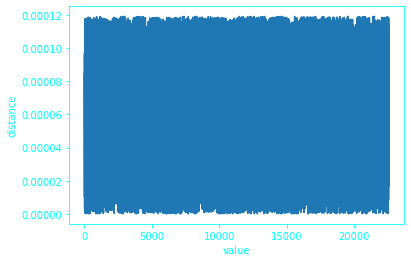

before
 [0.94959122 0.94936419 0.94936413 0.94936419 0.95033824 0.95215237
 0.95486248 0.96029747 0.96650386 0.97081888 0.97298694 0.97798979
 0.98344892 0.99231869 1.00114739 1.00655913 1.00903785 1.01145828
 1.01643229 1.02167106 1.02729321 1.03312111 1.03851378 1.04310107
 1.0467782  1.04966497 1.05172312 1.05288708 1.05314088 1.05300081]
after
 [0.94967574 0.94943768 0.94943768 0.94943768 0.9503898  0.95205593
 0.95491213 0.96038663 0.96657509 0.97085947 0.97300166 0.97800004
 0.98347449 0.9922812  1.0010879  1.00656235 1.0089426  1.0115608
 1.01632118 1.02155757 1.02727008 1.03322053 1.03845704 1.04321742
 1.04678774 1.04964399 1.05178618 1.05297625 1.05321419 1.05297625]
******************** RTPP2
Generic+Sequential
compressed bytes 19974
ratio 9.045759487333534
restored count 22585
(0.0, 0.00019085407257080078, 9.568651244522645e-05, 5.515472381539956e-05)


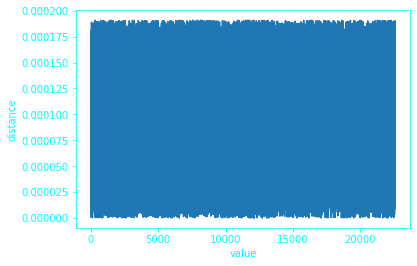

before
 [0.94959122 0.94936419 0.94936413 0.94936419 0.95033813 0.95215166
 0.95486003 0.96028376 0.96643794 0.97064763 0.97272086 0.977395
 0.98226827 0.98954999 0.99585831 0.99924403 1.00070608 1.00215614
 1.00538611 1.00909388 1.01332855 1.01790679 1.02238941 1.02645457
 1.02987444 1.03210378 1.03317654 1.0332669  1.03246689 1.03205991]
after
 [0.94954503 0.94954503 0.94954503 0.94954503 0.95030862 0.95221758
 0.95489007 0.96023518 0.96634382 0.9705435  0.97283423 0.97741574
 0.98237902 0.98963302 0.99574167 0.99917781 1.000705   1.00223207
 1.00528646 1.00910437 1.013304   1.01788545 1.02246702 1.02628493
 1.02972102 1.03201175 1.03315711 1.03315711 1.03239357 1.03201175]
******************** SignalMean
Generic+Sequential
compressed bytes 31476
ratio 5.740246537044097
restored count 22585
(0.0, 1.1026859283447266e-06, 5.483100161145863e-07, 3.177459398531901e-07)


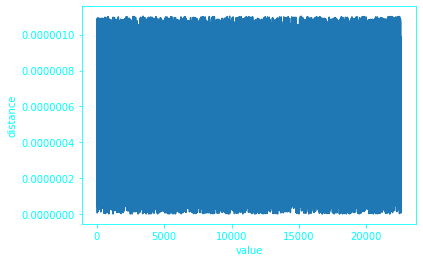

before
 [0.03410789 0.03302184 0.03302184 0.03302184 0.03154575 0.0302351
 0.02947978 0.02924204 0.0294069  0.0296475  0.02971201 0.02938212
 0.02869859 0.02795096 0.02747653 0.02726929 0.02723707 0.02718835
 0.02706701 0.02670706 0.02612094 0.0255615  0.02534177 0.0254011
 0.02554235 0.02538661 0.02501815 0.02461859 0.02439532 0.02441836]
after
 [0.03410705 0.03302091 0.03302091 0.03302091 0.03154482 0.03023616
 0.02948049 0.02924255 0.02940779 0.02964793 0.02971182 0.02938135
 0.02869838 0.02795152 0.02747565 0.02726856 0.02723771 0.02718924
 0.02706807 0.02670676 0.02612073 0.02556114 0.02534082 0.02540031
 0.02554131 0.02538709 0.02501917 0.0246182  0.02439568 0.02441771]


In [21]:
ratios2 = []
for i in range(scalars.shape[1]):
    print('*'*20, scalar_names[i])
    print('Generic+Sequential')
    scalar = scalars[:,i].ravel()
    compressed_scalars = DracoPy.encode_point_cloud_to_buffer(scalar, position=False, sequential=True, quantization_bits=14, create_metadata=True)
    print('compressed bytes', len(compressed_scalars))
    ratio = scalar.nbytes / len(compressed_scalars)
    ratios2.append(ratio)
    print('ratio', ratio)
    restored_scalars = DracoPy.decode_point_cloud_buffer(compressed_scalars)
    print('restored count', len(restored_scalars.points))
    stats, distances = TKO.Util.error(scalar.ravel()[0:len(restored_scalars.points)], restored_scalars.points)
    print(stats)
    TKO.Util.plot(distances, 'value', 'distance')
    print('before\n', scalar[0:30])
    print('after\n', np.array(restored_scalars.points[0:30]))

In [26]:
print(scalar_names)
print('position', ratios1)
print('generic', ratios2)

['NormalizedSignalEsti', 'EstimatedUncertainty', 'RTOP1', 'RTOP2', 'RTAP1', 'RTAP2', 'RTPP1', 'RTPP2', 'SignalMean']
position [5.18138281093172, 5.7699431564156605, 8.239317798349218, 15.65684575389948, 6.9946962951492395, 15.360027203944572, 7.2931298942439655, 8.240069320928535, 5.611702953691338]
generic [5.201819542811078, 6.509818050801657, 8.974320766900114, 19.65194692190559, 7.429887326260383, 19.026958719460826, 7.836911732812839, 9.045759487333534, 5.740246537044097]
